In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
df=pd.read_csv("data123.csv")
df.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
title      0
text       0
subject    0
date       0
dtype: int64


In [11]:
# Handling missing values
df.dropna(inplace=True)

In [12]:
# Checking for duplicate values
print("Duplicate Values:")
print(df.duplicated().sum())


Duplicate Values:
206


In [13]:
# Removing duplicate values
df.drop_duplicates(inplace=True)

In [14]:
# Basic statistics
print("Dataset Description:")
print(df.describe())


Dataset Description:
                                                    title  \
count                                               21211   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21211         21211   
unique                                              21192             2   
top     CHARLESTON, S.C. (Reuters) - Long viewed by th...  politicsNews   
freq                                                    2         11220   

                     date  
count               21211  
unique                716  
top     December 6, 2017   
freq                  166  


<ipython-input-39-0ad26cd73233>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['subject'], order=df['subject'].value_counts().index, palette='viridis')


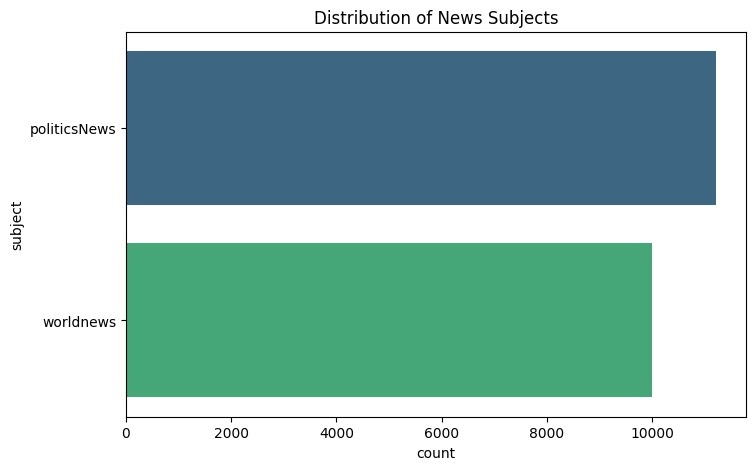

In [39]:
# Checking the distribution of the 'subject' column
plt.figure(figsize=(8,5))
sns.countplot(y=df['subject'], order=df['subject'].value_counts().index, palette='viridis')
plt.title("Distribution of News Subjects")
plt.show()

<ipython-input-40-e0d71973b2ac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='magma')


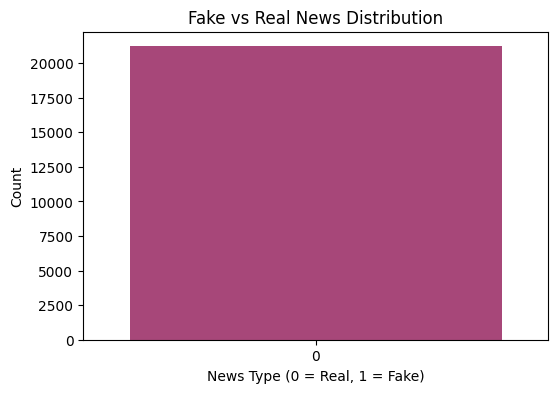

In [40]:

# Checking the distribution of fake vs real news if labeled
df['label'] = df['subject'].apply(lambda x: 1 if x.lower() == 'fake' else 0)  # Assuming 'fake' is a category
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette='magma')
plt.title("Fake vs Real News Distribution")
plt.xlabel("News Type (0 = Real, 1 = Fake)")
plt.ylabel("Count")
plt.show()

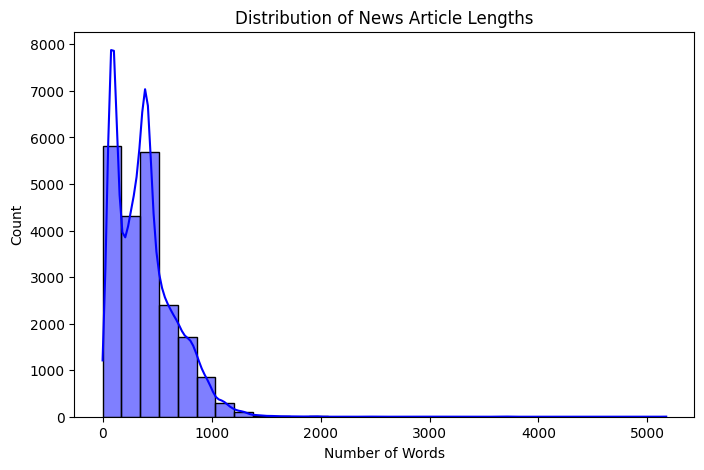

In [17]:
# Checking the length of text
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of News Article Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

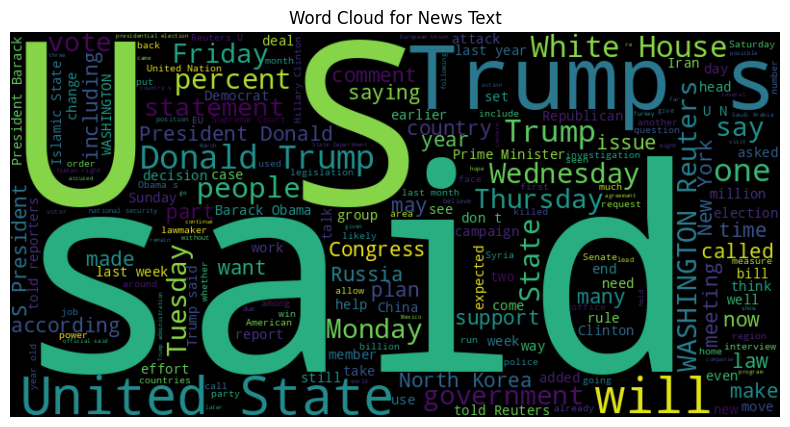

In [18]:
# Word cloud visualization
text_data = ' '.join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for News Text")
plt.show()

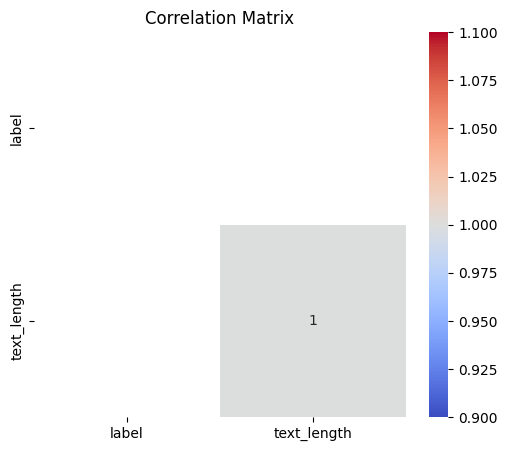

In [21]:
plt.figure(figsize=(6,5))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [26]:
# Analyzing most frequent words in fake news
df_fake = df[df['label'] == 1]

# Check if df_fake has text
if df_fake.empty:
    print("No fake news data available for word cloud.")
else:
    text_fake = ' '.join(df_fake['text'].dropna())

    if len(text_fake.strip()) == 0:
        print("Fake news text is empty after processing.")
    else:
        wordcloud_fake = WordCloud(width=800, height=400, background_color='red').generate(text_fake)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud_fake, interpolation='bilinear')
        plt.axis("off")
        plt.title("Word Cloud for Fake News Text")
        plt.show()


No fake news data available for word cloud.


<ipython-input-41-503d2093ab9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['label'], y=df['text_length'], palette='inferno')


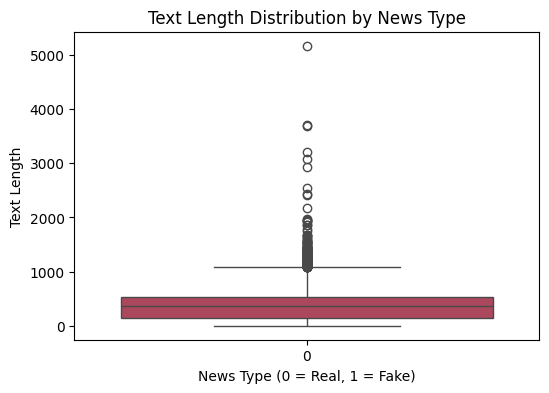

In [41]:
# Analyzing the average text length per category
plt.figure(figsize=(6,4))
sns.boxplot(x=df['label'], y=df['text_length'], palette='inferno')
plt.title("Text Length Distribution by News Type")
plt.xlabel("News Type (0 = Real, 1 = Fake)")
plt.ylabel("Text Length")
plt.show()

<Figure size 1200x800 with 0 Axes>

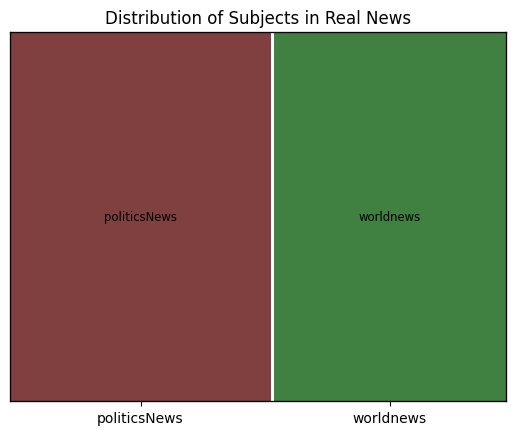

In [44]:

from statsmodels.graphics.mosaicplot import mosaic
subject_counts = df_real['subject'].value_counts()
subject_counts = subject_counts[subject_counts > 50]


mosaic_data = pd.DataFrame({'subject': subject_counts.index, 'count': subject_counts.values})
mosaic_data['count'] = mosaic_data['count'].astype(int)

# Convert DataFrame to dictionary format required by mosaic plot
mosaic_dict = {(row['subject'],): row['count'] for _, row in mosaic_data.iterrows()}

plt.figure(figsize=(12, 8))
mosaic(mosaic_dict, title='Distribution of Subjects in Real News')
plt.show()


In [31]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [32]:
# Converting text data into numerical format using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [33]:
# Training the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [34]:
# Making predictions
y_pred = model.predict(X_test_tfidf)


Model Accuracy: 1.00

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0   4243.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4243.0
weighted avg        1.0     1.0       1.0   4243.0

Confusion Matrix:
      0
0  4243


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


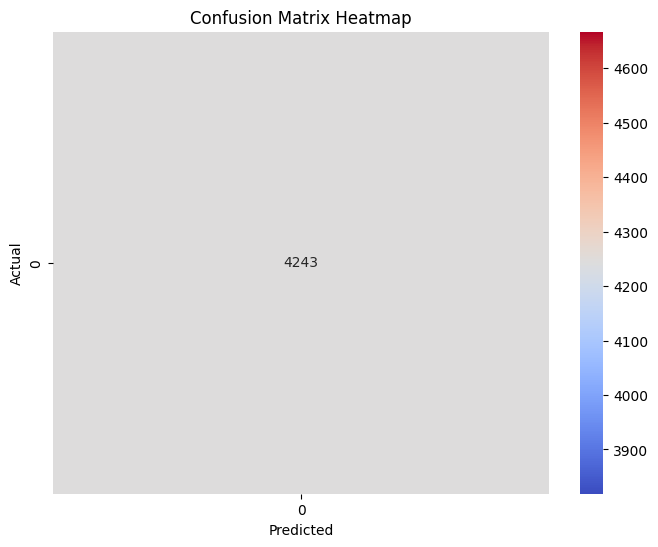

In [38]:


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:")

# Generate classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
print("Classification Report:")
print(class_report_df)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_report_df.index[:-3], columns=class_report_df.index[:-3])
print("Confusion Matrix:")
print(conf_matrix_df)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
